<a id='Top'></a>
# Data Science: Module 2
### Practical Challenge: Cross Validating a Linear Regression Model
#### Alan Leidner Sep 9, 2021
Assignment: https://yu.instructure.com/courses/50398/assignments/191947?module_item_id=704947

## Introduction
This notebook will explore data from the UC Irvine machine learning archive to gain some familiarity with the dataset, and get a general sense of what features are available. Then, it will construct a pair of cross-validated linear regression models that predict the weight of a vehicle. The cross-validated performance of the two models is then compared to identify the preferred model, and concluding thoughts added.

1. [Exploratory Data Analysis](#Analysis)
2. [Regression Model Construction & Evaluation](#Model)
3. [Conclusion](#Conclusion)

DataSource: https://archive.ics.uci.edu/ml/datasets/Automobile

#### 2)Exploratory Data Analysis(35Points): Explain + present your EDA work including any conclusions you draw from your analysis including any preliminary predictive inferences. This section should include any Python code usedfor the EDA. 



## Exploratory Data Analysis <a id='Analysis'></a>
The dataset was loaded into the DAV 6150 Github Repository here: https://github.com/yuleidner/DAV-6150/blob/main/M1%26M2/M2_Data.csv. This noebook will now load the table into a Pandas dataframe for analysis.

In [1]:
# load the pandas library
import pandas as pd

# load the train_test_split function from the sklearn.model_selection module
from sklearn.model_selection import train_test_split

# start by reading a set of sample data from github. This data set contains information related to cars, insurance
# and riskiness (+3 high risk to -3 low risk)
filename = "https://raw.githubusercontent.com/yuleidner/DAV-6150/main/M1%26M2/M2_Data.csv"
df = pd.read_csv(filename)
pd.set_option('display.max_columns', None) #expands df to display all columns
df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250


A lot of these variables are not readable to me. So here are attribute information copied from https://archive.ics.uci.edu/ml/datasets/Automobile
1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

It seems that column names were not included in the dataset. I will add them now

In [2]:
# adding column name to the respective columns
df.columns =['symboling', 'normalizedlosses', 'make', 'fueltype', 'aspiration','numofdoors', 'bodystyle',
            'drivewheels', 'enginelocation', 'wheelbase', 'length', 'width','height','curbweight', 'enginetype',
            'numofcylinders', 'enginesize', 'fuelsystem', 'bore', 'stroke', 'compression-ratio', 'horsepower', 
            'peakrpm', 'citympg', 'highwaympg', 'price']
df.head()

,symboling,normalizedlosses,make,fueltype,aspiration,numofdoors,bodystyle,drivewheels,enginelocation,wheelbase,length,width,height,curbweight,enginetype,numofcylinders,enginesize,fuelsystem,bore,stroke,compression-ratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250


In [3]:
##A few methods will now be called to view summaries of this dataframe
df.shape

(204, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalizedlosses   204 non-null    object 
 2   make               204 non-null    object 
 3   fueltype           204 non-null    object 
 4   aspiration         204 non-null    object 
 5   numofdoors         204 non-null    object 
 6   bodystyle          204 non-null    object 
 7   drivewheels        204 non-null    object 
 8   enginelocation     204 non-null    object 
 9   wheelbase          204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curbweight         204 non-null    int64  
 14  enginetype         204 non-null    object 
 15  numofcylinders     204 non-null    object 
 16  enginesize         204 non

In [6]:
df.describe()

,symboling,wheelbase,length,width,height,curbweight,enginesize,compression-ratio,citympg,highwaympg
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,0.823529,98.806373,174.075000,65.916667,53.749020,2555.602941,126.892157,10.148137,25.240196,30.769608
std,1.239035,5.994144,12.362123,2.146716,2.424901,521.960820,41.744569,3.981000,6.551513,6.898337
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.075000,52.000000,2145.000000,97.000000,8.575000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.200000,66.900000,55.500000,2939.250000,142.000000,9.400000,30.000000,34.500000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


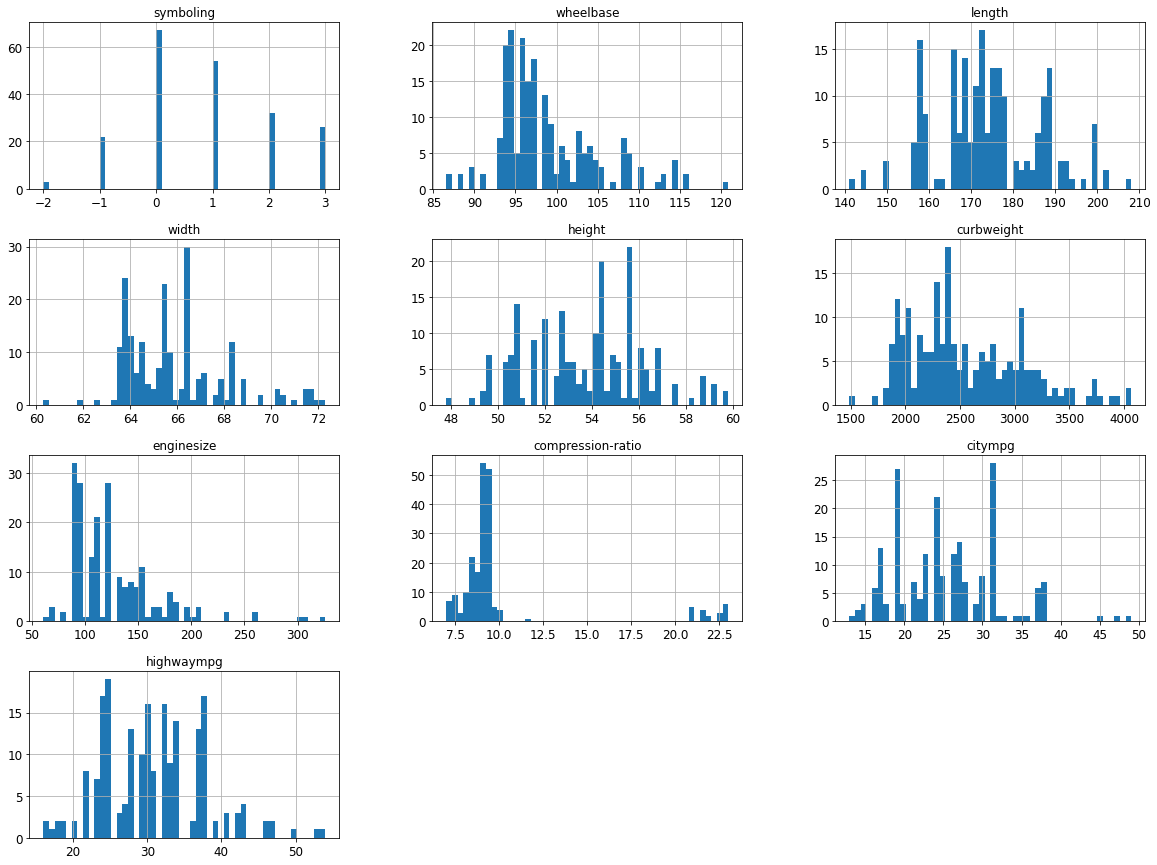

In [7]:
# This next cell creates histograms from numeric values in the dataframe, code sourced from HOML Chapter 02
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

This set of histograms has a few points of interest. 
1. The response variable we are truing to predict seems roughly normalized, though slightly skewed left. If we had more than 206 samples, I think we would see which trend reflects the truth.
2. Other roughly normalized values include: width, length, height
3. Other candidates for left leaning histograms include: highwaympg, enginesize, wheelbase

I believe performing regression modeling on these two sets of features should weight our decision to call the curbweight histogram either normalized or left skewed.

## Regression Model Construction & Evaluation <a id='Model'></a>

Scikit-learn provides us with an easy-to-use cross validation capability via the cross_val_score() function. To make use of it, we must first split their data into training and testing subsets (as we did above) and select the machine learning model we believe to be appropriate for their task at hand; in this case Linear Regression. Cross validation testing eliminates the need to create a separate evaluation / validation subset. 

In [10]:
## This separates the response variable ("curbweight") to prevent it from leaking into any explanatory variables. 
y = df.curbweight
y.head()

0    2548
1    2823
2    2337
3    2824
4    2507
Name: curbweight, dtype: int64

In [12]:
# To preserve the original dataframe in its entirety, make a copy of the original dataframe 
X = df.copy()

In [13]:
# Now drop the response variable column from 'X' so that it is removed from the explanatory variables
X.drop('curbweight', axis=1, inplace=True)
X.head()

,symboling,normalizedlosses,make,fueltype,aspiration,numofdoors,bodystyle,drivewheels,enginelocation,wheelbase,length,width,height,enginetype,numofcylinders,enginesize,fuelsystem,bore,stroke,compression-ratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250


In [14]:
# Now split the data into training and testing subsets. 
# We'll set aside 30% of the data for testing purposes, specifying a value for the inital random_state
# to have the ability to reproduce the exact same training + testing subsets repeatedly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
# Let's check the results
len(X_train)

142

In [16]:
len(X_test)

62

In [17]:
# Let's check the row indices of the new objects to see whether they match as another sanity check
y_test.head()

15     3380
9      2395
115    3252
78     2145
66     3515
Name: curbweight, dtype: int64

In [18]:
X_test.head()

,symboling,normalizedlosses,make,fueltype,aspiration,numofdoors,bodystyle,drivewheels,enginelocation,wheelbase,length,width,height,enginetype,numofcylinders,enginesize,fuelsystem,bore,stroke,compression-ratio,horsepower,peakrpm,citympg,highwaympg,price
15,0,?,bmw,gas,std,two,sedan,rwd,front,103.5,193.8,67.9,53.7,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,ohc,four,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16430
115,0,161,peugot,diesel,turbo,four,sedan,rwd,front,107.9,186.7,68.4,56.7,l,four,152,idi,3.7,3.52,21.0,95,4150,28,33,17950
78,1,161,mitsubishi,gas,turbo,two,hatchback,fwd,front,93.0,157.3,63.8,50.8,ohc,four,98,spdi,3.03,3.39,7.6,102,5500,24,30,7689
66,-1,93,mercedes-benz,diesel,turbo,four,sedan,rwd,front,110.0,190.9,70.3,56.5,ohc,five,183,idi,3.58,3.64,21.5,123,4350,22,25,25552


In [19]:
X_train.head()

,symboling,normalizedlosses,make,fueltype,aspiration,numofdoors,bodystyle,drivewheels,enginelocation,wheelbase,length,width,height,enginetype,numofcylinders,enginesize,fuelsystem,bore,stroke,compression-ratio,horsepower,peakrpm,citympg,highwaympg,price
98,0,106,nissan,gas,std,four,hatchback,fwd,front,97.2,173.4,65.2,54.7,ohc,four,120,2bbl,3.33,3.47,8.5,97,5200,27,34,8949
31,1,101,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,52.6,ohc,four,79,1bbl,2.91,3.07,10.1,60,5500,38,42,5399
12,0,188,bmw,gas,std,four,sedan,rwd,front,101.2,176.8,64.8,54.3,ohc,six,164,mpfi,3.31,3.19,9.0,121,4250,21,28,21105
35,0,78,honda,gas,std,four,wagon,fwd,front,96.5,157.1,63.9,58.3,ohc,four,92,1bbl,2.92,3.41,9.2,76,6000,30,34,7295
120,1,154,plymouth,gas,std,four,sedan,fwd,front,93.7,167.3,63.8,50.8,ohc,four,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6692


In [20]:
y_train.head()

98     2324
31     1837
12     2765
35     2024
120    1989
Name: curbweight, dtype: int64

Everything lines up, allowing us to perform the linear regression on the first set

In [21]:
# load the LinearRegression() function from sklearn's 'linear_model' sub-library
from sklearn.linear_model import LinearRegression

# load the cross_val_score function from the sklearn.model_selection module
from sklearn.model_selection import cross_val_score

# create a new dataframe containing only the enginesize, wheelbase, and length variables 
# these variables are chosen from Continuous variables (our explanatory variables for the linear regression model)
X1_train = X_train[['length', 'width', 'height']].copy()

# sanity check
X1_train.head()

,length,width,height
98,173.4,65.2,54.7
31,150.0,64.0,52.6
12,176.8,64.8,54.3
35,157.1,63.9,58.3
120,167.3,63.8,50.8


In [22]:
# Assing the model function you want to use to a variable
model = LinearRegression()

# fit the model using 5-fold cross validation; note how the 'model' variable created above is used as a parameter for the 
# cross_val_score() function. Also note how we can specify the number of folds to use during cross validation via the 'cv' 
# parameter
scores1 = cross_val_score(model, X1_train, y_train, cv=5)

# print out the R^2 metrics derived from the K-fold cross validation of our linear regression model
print (scores1)

[0.83319895 0.78516237 0.71843623 0.86804374 0.80043389]


In [23]:
import numpy as np

# calculate the average R^2 across all 5 folds
np.mean(scores1)

0.8010550372612073

# 2nd set

In [24]:
# create a new dataframe containing only the enginesize, wheelbase, and length variables 
# these variables are chosen from Categorical variables (our explanatory variables for the linear regression model)
X2_train = X_train[['highwaympg', 'enginesize', 'wheelbase']].copy()

# sanity check
X2_train.head()

,highwaympg,enginesize,wheelbase
98,34,120,97.2
31,42,79,93.7
12,28,164,101.2
35,34,92,96.5
120,38,90,93.7


In [25]:
# Assing the model function you want to use to a variable
model2 = LinearRegression()

# fit the model using 5-fold cross validation; note how the 'model' variable created above is used as a parameter for the 
# cross_val_score() function. Also note how we can specify the number of folds to use during cross validation via the 'cv' 
# parameter
scores2 = cross_val_score(model2, X2_train, y_train, cv=5)

# print out the R^2 metrics derived from the K-fold cross validation of our linear regression model
print (scores2)

[0.95430539 0.83912417 0.8260953  0.86915205 0.93128505]


In [26]:
# calculate the average R^2 across all 5 folds
np.mean(scores2)

0.8839923921715098

## Conclusion <a id='Conclusion'></a>

Maybe it was left skewed. perhaps a mixed set would have greater predictive value though?

A short video presentation of your work. Note that you do not need to appear on camera. Your second deliverable for this assignment(10 Points)is a short (approx. 5 minute) video presentationof your work. Your presentation should include a brief overview of your EDA findings, a high-level explanation of your regression models, and a summary of your cross validation findings + which model you prefer. 

In [ ]:
links to reference
http://localhost:8888/notebooks/Desktop/DAV-6150/M1%26M2/DAV%206150%20M2%20Lecture%20Notes.ipynb#
https://colab.research.google.com/drive/1YlEl3ZfM_88DOnOlGI6ghO3ST3Zz3q1R#scrollTo=l_4xpmjOkbVD
https://github.com/mattharrison/ml_pocket_reference/blob/master/ch03.ipynb
https://scikit-learn.org/stable/modules/cross_validation.html